---

___

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def simular_huygens_multi_pontos(lista_pontos, passos_tempo, grid_size=150):
    # Criamos a malha de coordenadas que representa a superfície do silício
    x, y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    
    # Inicializamos o mapa com "infinito" para garantir que qualquer 
    # distância calculada seja menor que o valor inicial.
    dist_minima = np.full((grid_size, grid_size), np.inf)
    
    # Aqui aplicamos o Princípio de Huygens: cada ponto de ataque gera sua própria onda.
    # A superfície final é o resultado da frente que chegar primeiro em cada voxel.
    for px, py in lista_pontos:
        # Pitágoras básico para calcular o raio de propagação a partir de cada gota de ácido
        dist_atual = np.sqrt((x - px)**2 + (y - py)**2)
        
        # O segredo do Colombo: mantemos apenas o menor tempo de chegada em cada ponto.
        # Isso faz com que as diferentes frentes de onda se fundam naturalmente.
        dist_minima = np.minimum(dist_minima, dist_atual)
    
    V = 2.0  # Velocidade nominal da corrosão (definida pela química do banho)
    
    # Vamos gerar os "frames" da simulação para ver a evolução no tempo
    fig, axes = plt.subplots(1, len(passos_tempo), figsize=(20, 5))
    
    for i, t in enumerate(passos_tempo):
        # O raio da onda expande linearmente (Distância = Velocidade * Tempo)
        raio_onda = V * t
        
        # Se a distância mínima até um ponto de ataque for menor que o raio atual,
        # significa que a reação química já consumiu o material naquele local.
        corrosao = dist_minima <= raio_onda
        
        ax = axes[i]
        # Visualização: Azul representa o ácido/vazio e o fundo representa o silício intacto
        ax.imshow(corrosao, cmap='Blues', origin='lower')
        ax.set_title(f"Tempo t = {t}\nFronteira R = {raio_onda:.1f}")
        ax.axis('off')

    plt.suptitle("Validação do Envelope de Huygens: Fusão de Múltiplas Frentes de Corrosão", fontsize=16)
    plt.tight_layout()
    plt.show()

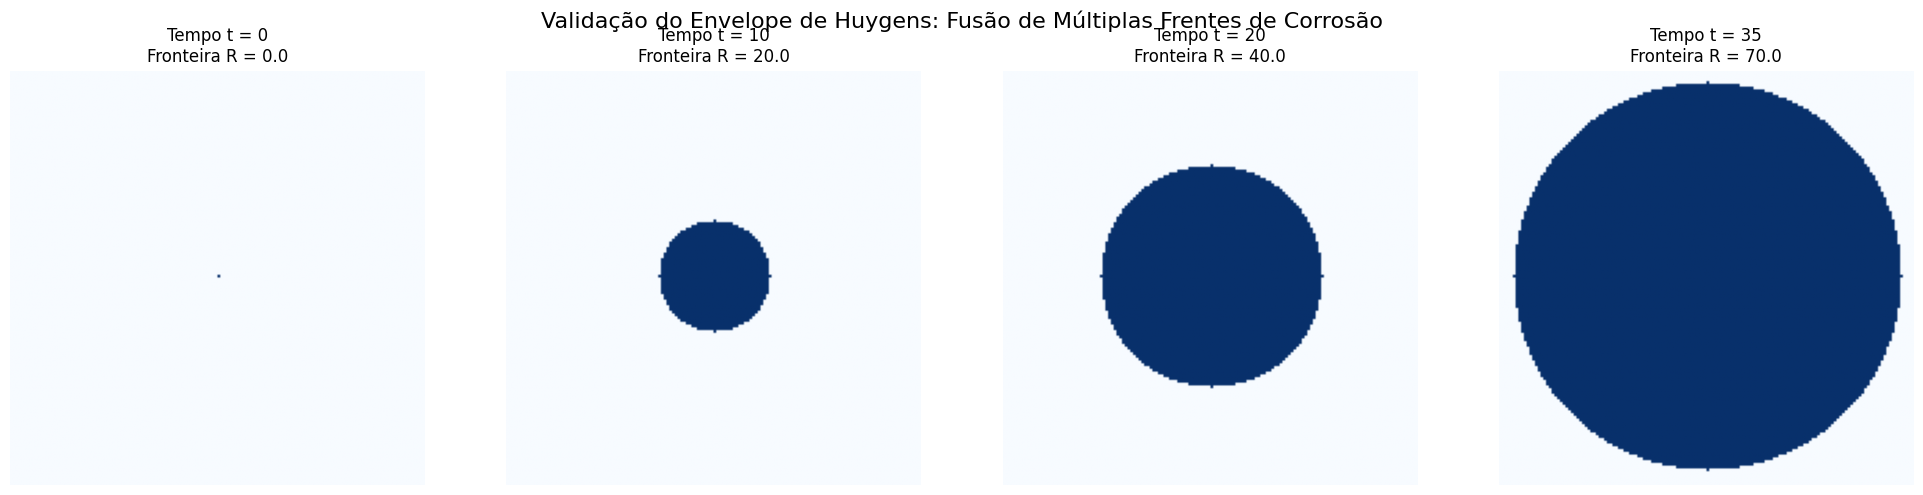

In [17]:
# Teste com uma configuração de 1 gotas de ácido formando um triângulo
meus_pontos = [(75, 75)]
simular_huygens_multi_pontos(meus_pontos, passos_tempo=[0, 10, 20, 35])

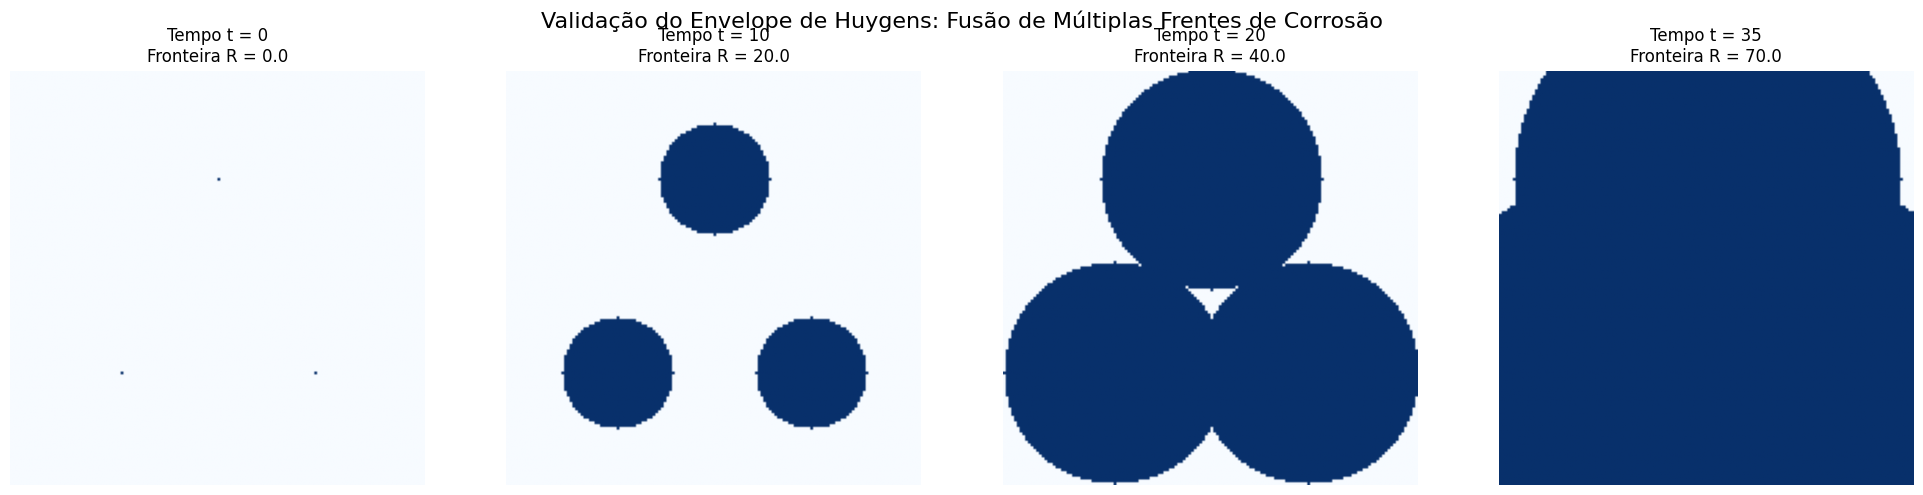

In [18]:
# Teste com uma configuração de 3 gotas de ácido formando um triângulo
meus_pontos = [(40, 40), (110, 40), (75, 110)]
simular_huygens_multi_pontos(meus_pontos, passos_tempo=[0, 10, 20, 35])